### Homework 3: covariate shift and deep ensembles
CS-229 Spring 2023

###Baseline (Training):

In [ ]:
import torch as t
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch.nn as nn
import torch.optim as optim
%matplotlib inline


class MyClassifier(t.nn.Module):
    """TODO: 2 points. Define your classifier. Note that my viz code below
    assumes outputs are logits."""
    def __init__(self, n_classes=2, p=0.5):
        super().__init__()
        self.fc1=nn.Linear(2,64)
        # self.dropout1 = nn.Dropout(p)
        self.relu1=nn.ReLU()
        self.fc2=nn.Linear(64,32)
        # self.dropout2 = nn.Dropout(p)
        self.relu2=nn.ReLU()
        self.fc3=nn.Linear(32,n_classes)
        self.rand_init_weights()

    def rand_init_weights(self):
        for w in self.modules():
            if isinstance(w, nn.Linear):
                nn.init.kaiming_uniform_(w.weight, mode='fan_in', nonlinearity='relu')


    def forward(self, x):
        x = self.fc1(x)
        # x = self.dropout1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        # x = self.dropout2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x
                              
class MyEnsemble(t.nn.Module):
    """TODO: 2 points, ensembled model
    This class implements an ensemble classifier from a list of models.
    Note that my viz code below assumes outputs are all logits. 
    """
    def __init__(self, models):
        super().__init__()
        self.models = models
        
    def forward(self, x):
        logits = []
        for model in self.models:
            logits.append(model(x))
        logits = t.stack(logits, dim=0)
        return logits.mean(dim=0) 


# Load data and construct train dataloaders
x_train, y_train, x_val, y_val, x_test, y_test = t.load('hw3_data.pt')
print('dataset sizes: ', x_train.shape, x_val.shape, x_test.shape)
batch_size = 100
train_ds = t.utils.data.TensorDataset(x_train, y_train)
train_dl = t.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# Create and train models
n_models = 10
models = []
for i in range(n_models):
    model = MyClassifier()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    for epoch in range(10):
        total_loss = 0.0
        for inputs, labels in train_dl:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.type(t.long))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print("Model %d, Epoch %d, Loss: %.3f" % (i+1, epoch+1, total_loss/len(train_dl)))
    
    # TODO: 2 points. Train each model on train_dl.
    
    models.append(model)  # store them for evaluation and ensembling
    
model_ens1 = MyEnsemble(models)  # Construct the ensemble model

dataset sizes:  torch.Size([2000, 2]) torch.Size([2000, 2]) torch.Size([1000, 2])
Model 1, Epoch 1, Loss: 0.272
Model 1, Epoch 2, Loss: 0.017
Model 1, Epoch 3, Loss: 0.011
Model 1, Epoch 4, Loss: 0.006
Model 1, Epoch 5, Loss: 0.005
Model 1, Epoch 6, Loss: 0.003
Model 1, Epoch 7, Loss: 0.003
Model 1, Epoch 8, Loss: 0.003
Model 1, Epoch 9, Loss: 0.003
Model 1, Epoch 10, Loss: 0.002
Model 2, Epoch 1, Loss: 0.098
Model 2, Epoch 2, Loss: 0.014
Model 2, Epoch 3, Loss: 0.007
Model 2, Epoch 4, Loss: 0.005
Model 2, Epoch 5, Loss: 0.006
Model 2, Epoch 6, Loss: 0.006
Model 2, Epoch 7, Loss: 0.004
Model 2, Epoch 8, Loss: 0.006
Model 2, Epoch 9, Loss: 0.003
Model 2, Epoch 10, Loss: 0.003
Model 3, Epoch 1, Loss: 0.233
Model 3, Epoch 2, Loss: 0.014
Model 3, Epoch 3, Loss: 0.010
Model 3, Epoch 4, Loss: 0.007
Model 3, Epoch 5, Loss: 0.005
Model 3, Epoch 6, Loss: 0.006
Model 3, Epoch 7, Loss: 0.006
Model 3, Epoch 8, Loss: 0.006
Model 3, Epoch 9, Loss: 0.005
Model 3, Epoch 10, Loss: 0.006
Model 4, Epoch 

###Training with dropout:

In [ ]:
import torch as t
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch.nn as nn
import torch.optim as optim
%matplotlib inline


class MyClassifier2(t.nn.Module):
    """TODO: 2 points. Define your classifier. Note that my viz code below
    assumes outputs are logits."""
    def __init__(self, n_classes=2, p=0.5):
        super().__init__()
        self.fc1=nn.Linear(2,64)
        self.dropout1 = nn.Dropout(p)
        self.relu1=nn.ReLU()
        self.fc2=nn.Linear(64,32)
        self.dropout2 = nn.Dropout(p)
        self.relu2=nn.ReLU()
        self.fc3=nn.Linear(32,n_classes)
        self.rand_init_weights()

    def rand_init_weights(self):
        for w in self.modules():
            if isinstance(w, nn.Linear):
                nn.init.kaiming_uniform_(w.weight, mode='fan_in', nonlinearity='relu')


    def forward(self, x):
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x
                              
# Load data and construct train dataloaders
x_train, y_train, x_val, y_val, x_test, y_test = t.load('hw3_data.pt')
print('dataset sizes: ', x_train.shape, x_val.shape, x_test.shape)
batch_size = 100
train_ds = t.utils.data.TensorDataset(x_train, y_train)
train_dl = t.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# Create and train models
n_models = 10
models2 = []
for i in range(n_models):
    model = MyClassifier2()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    for epoch in range(10):
        total_loss = 0.0
        for inputs, labels in train_dl:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.type(t.long))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print("Model %d, Epoch %d, Loss: %.3f" % (i+1, epoch+1, total_loss/len(train_dl)))
    
    # TODO: 2 points. Train each model on train_dl.
    
    models2.append(model)  # store them for evaluation and ensembling
    
model_ens2 = MyEnsemble(models2)  # Construct the ensemble model

dataset sizes:  torch.Size([2000, 2]) torch.Size([2000, 2]) torch.Size([1000, 2])
Model 1, Epoch 1, Loss: 0.371
Model 1, Epoch 2, Loss: 0.042
Model 1, Epoch 3, Loss: 0.036
Model 1, Epoch 4, Loss: 0.025
Model 1, Epoch 5, Loss: 0.019
Model 1, Epoch 6, Loss: 0.037
Model 1, Epoch 7, Loss: 0.019
Model 1, Epoch 8, Loss: 0.015
Model 1, Epoch 9, Loss: 0.012
Model 1, Epoch 10, Loss: 0.012
Model 2, Epoch 1, Loss: 0.342
Model 2, Epoch 2, Loss: 0.042
Model 2, Epoch 3, Loss: 0.041
Model 2, Epoch 4, Loss: 0.018
Model 2, Epoch 5, Loss: 0.028
Model 2, Epoch 6, Loss: 0.026
Model 2, Epoch 7, Loss: 0.016
Model 2, Epoch 8, Loss: 0.016
Model 2, Epoch 9, Loss: 0.016
Model 2, Epoch 10, Loss: 0.011
Model 3, Epoch 1, Loss: 0.676
Model 3, Epoch 2, Loss: 0.039
Model 3, Epoch 3, Loss: 0.030
Model 3, Epoch 4, Loss: 0.024
Model 3, Epoch 5, Loss: 0.026
Model 3, Epoch 6, Loss: 0.026
Model 3, Epoch 7, Loss: 0.011
Model 3, Epoch 8, Loss: 0.016
Model 3, Epoch 9, Loss: 0.018
Model 3, Epoch 10, Loss: 0.019
Model 4, Epoch 

### Output the accuracy and expected calibration error, for the model and ensemble

In [ ]:
def accuracy(model, x, y):
    # TODO: 1 point accuracy function
    with t.no_grad():
        # model.eval()
        output = model(x)
        _, predicted = t.max(output, dim=1)
        correct = predicted.eq(y).sum().item()
        total = y.size(0)
        acc = correct / total

    return acc
    
def ece(model, x, y, bins=10):
    # TODO: expected calibration error, 2 point
    with t.no_grad():
        # model.eval()
        output = model(x)
        _, predicted = t.max(output, dim=1)
        
        confidences = t.softmax(output, dim=1)
        bin_boundaries = t.linspace(0, 1, bins + 1)
        
        accuracies = t.eq(predicted, y).float()
        confidences_max = t.max(confidences, dim=1)[0]
        
        ece = t.zeros(1)
        
        for bin_idx in range(bins):
            bin_mask = (confidences_max > bin_boundaries[bin_idx]) & (confidences_max <= bin_boundaries[bin_idx + 1])
            
            if t.sum(bin_mask) > 0:
                accuracy_in_bin = t.mean(accuracies[bin_mask])
                confidence_in_bin = t.mean(confidences_max[bin_mask])
                
                ece += t.abs(accuracy_in_bin - confidence_in_bin) * t.sum(bin_mask)
        
        ece /= x.size(0)
    
    return ece.item()

    
# TODO (1 point): run accuracy/ece on models/data to generate table.
# Don't forget to turn off grad tracking and use eval mode, 
# It's good practice even it doesn't make much difference here. 

# Feel free to use my code below that automatically outputs a nice table.
# Pandas can output latex tables too, very convenient. 

def vector_of_results(model):
    columns = ['Acc-train', 'Acc-val', 'Acc-test', 
               'ECE-train', 'ECE-val', 'ECE-test']
    results = t.zeros(6)
    results[0] = accuracy(model, x_train, y_train)
    results[1] = accuracy(model, x_val, y_val)
    results[2] = accuracy(model, x_test, y_test)
    results[3] = ece(model, x_train, y_train)
    results[4] = ece(model, x_val, y_val)
    results[5] = ece(model, x_test, y_test)
    return columns, results



###Results (Baseline):

In [ ]:
with t.no_grad():
    results = t.zeros(6, 10)  # accuracy/ECE for train/val/test, then model index
    for i, model in enumerate(models):
        model.eval()  
        columns, results[:,i] = vector_of_results(model)
    results = results.mean(axis=1)
    
    columns, ens_results = vector_of_results(model_ens1)


df = pd.DataFrame(data=[results.numpy(), ens_results.numpy()], index=['Mean of models', 'Ensemble model'], columns=columns)
precision = '{:.3f}'.format
print(df.to_string(float_format=precision))

                Acc-train  Acc-val  Acc-test  ECE-train  ECE-val  ECE-test
Mean of models      0.999    0.998     0.945      0.001    0.002     0.029
Ensemble model      1.000    0.999     0.954      0.002    0.002     0.021


In [ ]:
def plot_ensemble(ensemble, flag=False):
  # Feel free to use my code or make your own. 

  # viz datasets
  fig, ax = plt.subplots()

  for label in [0, 1]:
      ax.scatter(x_test[y_test==label, 0],x_test[y_test==label, 1], s=20, alpha=0.1, label='test y='+str(label))
      ax.scatter(x_train[y_train==label, 0],x_train[y_train==label, 1], s=20, alpha=0.1, label='train y='+str(label))

  # Contour plot
  k = 200
  X = t.stack(t.meshgrid(t.linspace(-5, 5, k), t.linspace(-5, 5, k))).reshape((2, -1)).T
  xx = X[:,0].reshape((k,k))
  yy = X[:,1].reshape((k,k))

  with t.no_grad():
      for i, model in enumerate(models):
          if(flag):
            model.train()
          pred = t.softmax(model(X), axis=1)[:,0].numpy()
          zz = pred.reshape((k,k)).astype('float')
          contour = ax.contour(xx, yy, zz, levels=[0.5], alpha=0.5)

          contour.collections[0].set_color('black')
          contour.collections[0].set_linewidth(1)
          # contour.collections[0].set_label('model '+str(i))
          
      pred = t.softmax(ensemble(X), axis=1)[:,0].numpy()
      zz = pred.reshape((k,k)).astype('float')
      contour = ax.contour(xx, yy, zz, levels=[0.5], alpha=1)

      contour.collections[0].set_color('red')
      contour.collections[0].set_linewidth(2)

  handles, labels = ax.get_legend_handles_labels()
  from matplotlib.lines import Line2D
  line = Line2D([0], [0], label='Ensemble', color='red')
  line2 = Line2D([0], [0], label='Individual models', color='black')
  # add manual symbols to auto legend
  handles.extend([line, line2])
      
  ax.legend(handles=handles, loc='upper left')
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  fig.tight_layout()

### Visualize the results (Baseline):

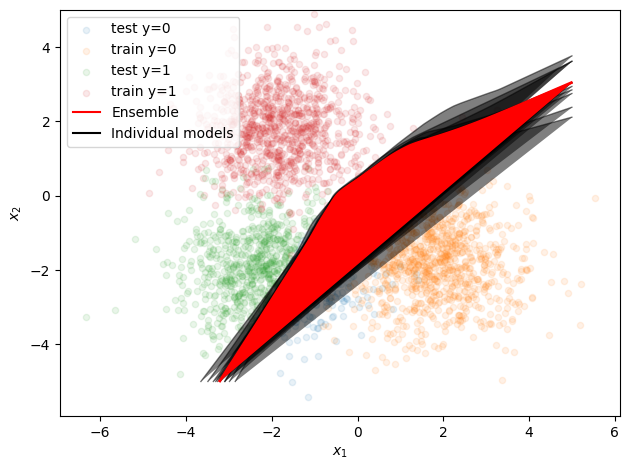

In [ ]:
plot_ensemble(model_ens1)

###Results (With dropout at inference time):

In [ ]:
with t.no_grad():
    results = t.zeros(6, 10)  # accuracy/ECE for train/val/test, then model index
    for i, model in enumerate(models2):
        model.train() #To enable dropout at inference time
        columns, results[:,i] = vector_of_results(model)
    results = results.mean(axis=1)
    
    columns, ens_results = vector_of_results(model_ens2)


df = pd.DataFrame(data=[results.numpy(), ens_results.numpy()], index=['Mean of models', 'Ensemble model'], columns=columns)
precision = '{:.3f}'.format
print(df.to_string(float_format=precision))

                Acc-train  Acc-val  Acc-test  ECE-train  ECE-val  ECE-test
Mean of models      0.996    0.994     0.771      0.003    0.003     0.180
Ensemble model      0.997    0.994     0.821      0.002    0.003     0.138


### Visualize the results (With dropout at inference time):

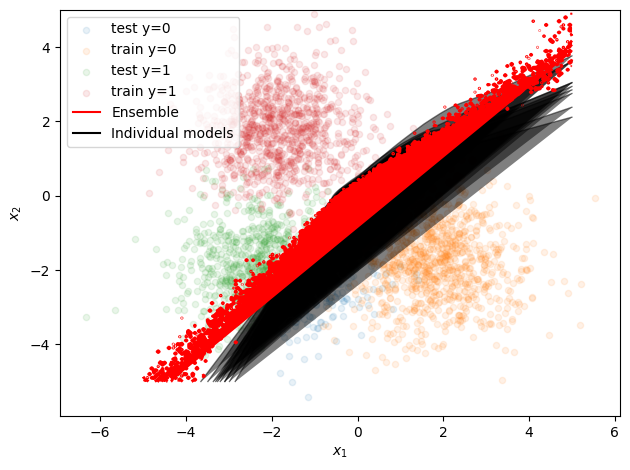

In [ ]:
plot_ensemble(model_ens2, flag=True)

###Results (Without dropout at inference time):

In [ ]:
with t.no_grad():
    results = t.zeros(6, 10)  # accuracy/ECE for train/val/test, then model index
    for i, model in enumerate(models2):
        model.eval() #To disable dropout at inference time
        columns, results[:,i] = vector_of_results(model)
    results = results.mean(axis=1)
    
    columns, ens_results = vector_of_results(model_ens2)


df = pd.DataFrame(data=[results.numpy(), ens_results.numpy()], index=['Mean of models', 'Ensemble model'], columns=columns)
precision = '{:.3f}'.format
print(df.to_string(float_format=precision))

                Acc-train  Acc-val  Acc-test  ECE-train  ECE-val  ECE-test
Mean of models      0.997    0.997     0.841      0.002    0.004     0.109
Ensemble model      0.997    0.998     0.843      0.003    0.003     0.103


### Visualize the results (Without dropout at inference time):

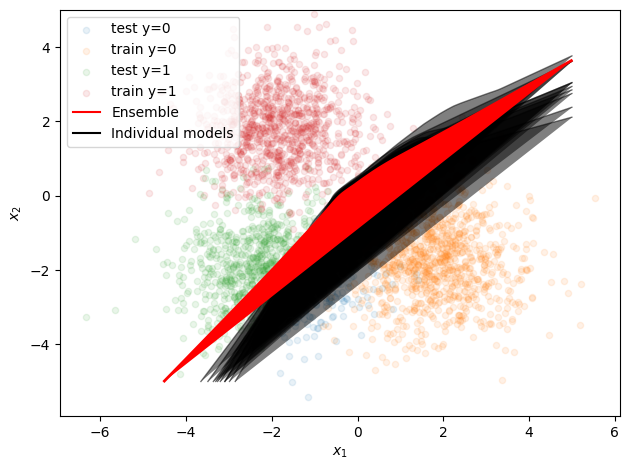

In [ ]:
plot_ensemble(model_ens2)

###SWAG:

In [ ]:
class SWAGEnsemble(MyEnsemble):
    """SWAG ensemble model inheriting from MyEnsemble.
    This class represents the SWAG ensemble model and provides additional functionality for SWAG."""
    def __init__(self, models):
        super().__init__(models)
        self.swag_weights = []
        
    def collect_swag_weights(self):
        """Collect the SWAG weights from individual models."""
        for model in self.models:
            swag_params = []
            for param in model.parameters():
                if param.requires_grad:
                    swag_params.append(t.flatten(param))
            self.swag_weights.append(t.cat(swag_params))
    
    def apply_swag_weights(self):
        """Apply the SWAG weights to the model."""
        for model in self.models:
            swag_params = self.swag_weights.pop(0)
            idx = 0
            for param in model.parameters():
                if param.requires_grad:
                    size = param.numel()
                    param.data.copy_(swag_params[idx : idx + size].view_as(param))
                    idx += size


# Load data and construct train dataloaders
x_train, y_train, x_val, y_val, x_test, y_test = t.load('hw3_data.pt')
print('dataset sizes: ', x_train.shape, x_val.shape, x_test.shape)
batch_size = 100
train_ds = t.utils.data.TensorDataset(x_train, y_train)
train_dl = t.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# Create and train models
n_models = 10
models3 = []
for i in range(n_models):
    model = MyClassifier()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    for epoch in range(10):
        total_loss = 0.0
        for inputs, labels in train_dl:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.type(t.long))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print("Model %d, Epoch %d, Loss: %.3f" % (i+1, epoch+1, total_loss/len(train_dl)))
    
    models3.append(model)  # store them for evaluation and ensembling

swag_ensemble_model = SWAGEnsemble(models3)  # Construct the SWAG ensemble model
swag_ensemble_model.collect_swag_weights()  # Collect the SWAG weights

# Apply SWAG weights during inference
swag_ensemble_model.apply_swag_weights()


dataset sizes:  torch.Size([2000, 2]) torch.Size([2000, 2]) torch.Size([1000, 2])
Model 1, Epoch 1, Loss: 0.072
Model 1, Epoch 2, Loss: 0.016
Model 1, Epoch 3, Loss: 0.007
Model 1, Epoch 4, Loss: 0.007
Model 1, Epoch 5, Loss: 0.007
Model 1, Epoch 6, Loss: 0.008
Model 1, Epoch 7, Loss: 0.005
Model 1, Epoch 8, Loss: 0.003
Model 1, Epoch 9, Loss: 0.003
Model 1, Epoch 10, Loss: 0.005
Model 2, Epoch 1, Loss: 0.064
Model 2, Epoch 2, Loss: 0.018
Model 2, Epoch 3, Loss: 0.011
Model 2, Epoch 4, Loss: 0.007
Model 2, Epoch 5, Loss: 0.006
Model 2, Epoch 6, Loss: 0.005
Model 2, Epoch 7, Loss: 0.004
Model 2, Epoch 8, Loss: 0.004
Model 2, Epoch 9, Loss: 0.006
Model 2, Epoch 10, Loss: 0.009
Model 3, Epoch 1, Loss: 0.122
Model 3, Epoch 2, Loss: 0.018
Model 3, Epoch 3, Loss: 0.013
Model 3, Epoch 4, Loss: 0.009
Model 3, Epoch 5, Loss: 0.008
Model 3, Epoch 6, Loss: 0.009
Model 3, Epoch 7, Loss: 0.008
Model 3, Epoch 8, Loss: 0.006
Model 3, Epoch 9, Loss: 0.006
Model 3, Epoch 10, Loss: 0.004
Model 4, Epoch 

###Results (SWAG):

In [ ]:
with t.no_grad():
    results = t.zeros(6, 10)  # accuracy/ECE for train/val/test, then model index
    for i, model in enumerate(models3):
        model.eval() 
        columns, results[:,i] = vector_of_results(model)
    results = results.mean(axis=1)
    
    columns, ens_results = vector_of_results(swag_ensemble_model)


df = pd.DataFrame(data=[results.numpy(), ens_results.numpy()], index=['Mean of models', 'Ensemble model'], columns=columns)
precision = '{:.3f}'.format
print(df.to_string(float_format=precision))

                Acc-train  Acc-val  Acc-test  ECE-train  ECE-val  ECE-test
Mean of models      0.999    0.999     0.940      0.002    0.002     0.036
Ensemble model      0.999    0.999     0.956      0.001    0.002     0.020


### Visualize the results (SWAG):


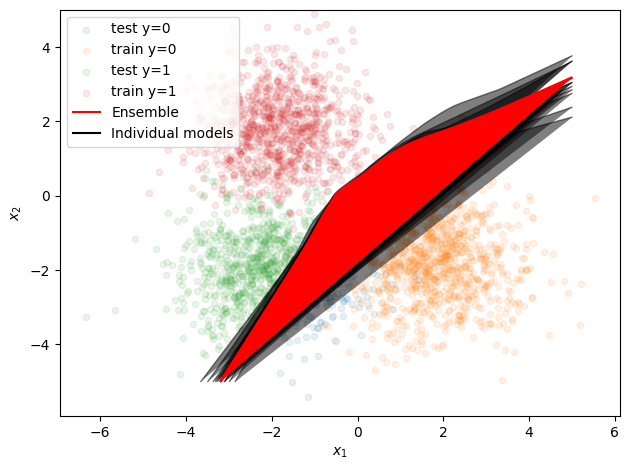

In [ ]:
plot_ensemble(swag_ensemble_model)

##Mixup:

In [ ]:
import numpy as np
def mixup(X, y, alpha=0.4):
    lamda = np.random.beta(alpha, alpha)    
    i = t.randperm(batch_size)

    mixed_X = lamda * X + (1 - lamda) * X[i, :]
    mixed_y = lamda * y + (1 - lamda) * y[i]
    X = t.cat((X, mixed_X), 0)

    mixed_y = t.floor(mixed_y * 2)
    mixed_y = t.clamp(mixed_y, min=None, max=1)
    y = t.cat((y, mixed_y), 0)
    
    return X, y

In [ ]:
# Load data and construct train dataloaders
x_train, y_train, x_val, y_val, x_test, y_test = t.load('hw3_data.pt')
print('dataset sizes: ', x_train.shape, x_val.shape, x_test.shape)
batch_size = 100
train_ds = t.utils.data.TensorDataset(x_train, y_train)
train_dl = t.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)

# Create and train models
n_models = 10
models4 = []
for i in range(n_models):
    model = MyClassifier()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    for epoch in range(10):
        total_loss = 0.0
        for inputs, labels in train_dl:
            inputs_mx, labels_mx = mixup(inputs, labels)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.type(t.long))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print("Model %d, Epoch %d, Loss: %.3f" % (i+1, epoch+1, total_loss/len(train_dl)))
    
    # TODO: 2 points. Train each model on train_dl.
    
    models4.append(model)  # store them for evaluation and ensembling
    
model_ens4 = MyEnsemble(models4)  # Construct the ensemble model

dataset sizes:  torch.Size([2000, 2]) torch.Size([2000, 2]) torch.Size([1000, 2])
Model 1, Epoch 1, Loss: 0.026
Model 1, Epoch 2, Loss: 0.022
Model 1, Epoch 3, Loss: 0.007
Model 1, Epoch 4, Loss: 0.006
Model 1, Epoch 5, Loss: 0.008
Model 1, Epoch 6, Loss: 0.005
Model 1, Epoch 7, Loss: 0.005
Model 1, Epoch 8, Loss: 0.008
Model 1, Epoch 9, Loss: 0.008
Model 1, Epoch 10, Loss: 0.004
Model 2, Epoch 1, Loss: 0.104
Model 2, Epoch 2, Loss: 0.015
Model 2, Epoch 3, Loss: 0.011
Model 2, Epoch 4, Loss: 0.006
Model 2, Epoch 5, Loss: 0.007
Model 2, Epoch 6, Loss: 0.008
Model 2, Epoch 7, Loss: 0.004
Model 2, Epoch 8, Loss: 0.004
Model 2, Epoch 9, Loss: 0.004
Model 2, Epoch 10, Loss: 0.003
Model 3, Epoch 1, Loss: 0.033
Model 3, Epoch 2, Loss: 0.015
Model 3, Epoch 3, Loss: 0.007
Model 3, Epoch 4, Loss: 0.004
Model 3, Epoch 5, Loss: 0.004
Model 3, Epoch 6, Loss: 0.004
Model 3, Epoch 7, Loss: 0.002
Model 3, Epoch 8, Loss: 0.010
Model 3, Epoch 9, Loss: 0.002
Model 3, Epoch 10, Loss: 0.003
Model 4, Epoch 

###Results (Mixup):

In [ ]:
with t.no_grad():
    results = t.zeros(6, 10)  # accuracy/ECE for train/val/test, then model index
    for i, model in enumerate(models4):
        model.eval() 
        columns, results[:,i] = vector_of_results(model)
    results = results.mean(axis=1)
    
    columns, ens_results = vector_of_results(model_ens4)


df = pd.DataFrame(data=[results.numpy(), ens_results.numpy()], index=['Mean of models', 'Ensemble model'], columns=columns)
precision = '{:.3f}'.format
print(df.to_string(float_format=precision))

                Acc-train  Acc-val  Acc-test  ECE-train  ECE-val  ECE-test
Mean of models      0.999    0.998     0.940      0.002    0.002     0.032
Ensemble model      1.000    0.999     0.952      0.002    0.002     0.019


### Visualize the results (Mixup):


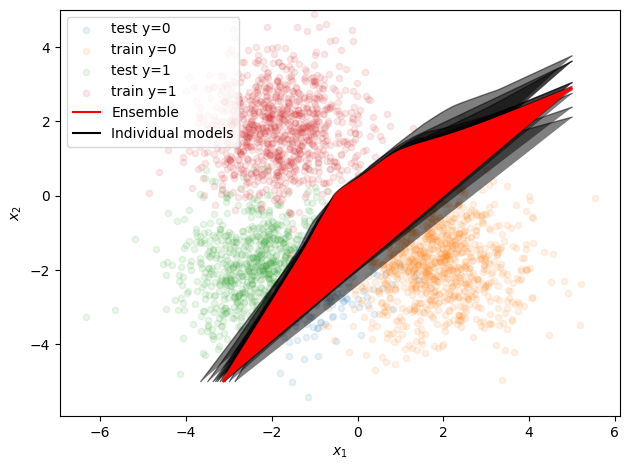

In [ ]:
plot_ensemble(model_ens4)